In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [3]:
def difference(M, colour, coords, phi, n=4, order=1):
    """
    Calculates the the quantity:

        beta * same_colours

    where `same_colours` indicate the number
    of neighbours with the same colour as the
    input argument.

    Neighbourhood scheme:

        [[0, 1, 0],
         [1, 0, 1],
         [0, 1, 0]]
    """
    height, width = M.shape
    i, j = coords

    weight = 1

    def neighbours(x, y, n=4):
        # Four neighbour scheme
        neighbours = np.array([(x-1, y), (x, y-1), (x+1, y), (x, y+1)])
        # Eight neighbour scheme
        if n >= 8:
            diagonal = np.array([(x-1, y-1), (x-1, y+1), (x+1, y-1), (x+1, y+1)])
            neighbours = np.vstack([neighbours, diagonal])
        # Twelve neighbour scheme
        if n >= 12:
            extremal = np.array([(x-2, y), (x, y-2), (x+2, y), (x, y+2)])
            neighbours = np.vstack([neighbours, extremal])
        return neighbours

    def boundary(index):
        i, j = index
        # Remove boundary points
        if i < 0 or j < 0:
            return False
        if i >= height or j >= width:
            return False
        return True

    positions = list(filter(boundary, neighbours(i, j, n)))

    neighbour_colours = [M[i, j] for i, j in np.array(positions)]
    first_order = [phi(next_colour - colour) for next_colour in neighbour_colours]

    return weight * sum(first_order)

In [22]:
np.random.choice(Y.flatten())

0.035228190628937839

In [23]:
def mh_sample(Y, n_iter, phi, colors = [0, 1], noise_var=0.3, beta=1):
    """
    Computes a sample output image based
    from the posterior based on input
    image Y. An Ising model is solved
    locally in order to provide a denoised
    sample of Y.
    """
    n, m = Y.shape
    X = np.zeros((n,m))

    # Generate a chain of length n_iter
    for k in range(n_iter):
        for i in range(n):
            for j in range(m):
                x_candidate = np.random.choice(Y.flatten())

                h             = - 1.0/(2*noise_var) * (Y[i,j] - X[i,j])**2
                h_candidate   = - 1.0/(2*noise_var) * (Y[i,j] - x_candidate)**2
                
                d             = beta * difference(X, X[i,j], (i, j), phi) + h
                d_candidate   = beta * difference(X, x_candidate, (i, j), phi) + h_candidate


                # Acceptance probability
                p = np.exp(min(0, d_candidate - d))
                U = np.random.uniform()
                if U < p:
                    X[i,j] = x_candidate

        print("Iteration", k)

    return X

In [17]:
from skimage import data
from skimage.util import random_noise

# How do we estimate this for our model?
variance = 0.01

# Colors - a linear space between + and 1
colors = np.linspace(0, 1, 24)


#X = data.horse()
X = data.camera()
Y = random_noise(X, "gaussian", var=variance)
X = X.astype(float)

In [26]:
phi = lambda u: np.log(1+u**2)

X_sample = mh_sample(Y, 10, phi)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9


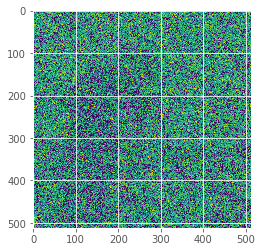

In [27]:
plt.imshow(X_sample)

NameError: name 'X_sample' is not defined

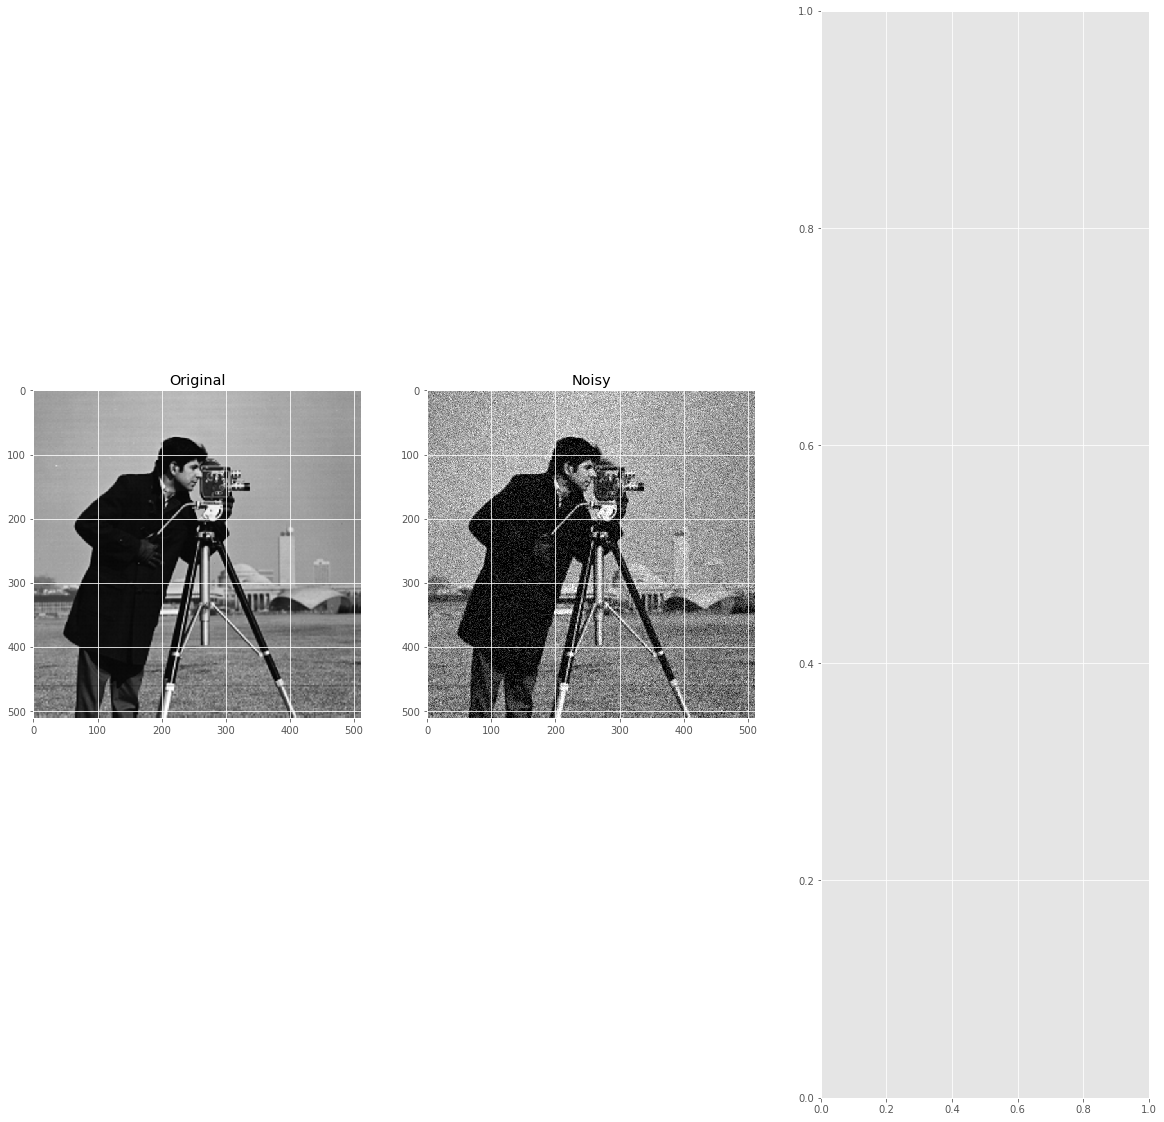

In [8]:

f, axarr = plt.subplots(1, 3, figsize=(20, 20))

axarr[0].imshow(X, cmap="gray")
axarr[0].set_title("Original")

axarr[1].imshow(Y, cmap="gray")
axarr[1].set_title("Noisy")

axarr[2].imshow(X_sample, cmap="gray")
axarr[2].set_title("Posterior Sample")